In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv('../Daniel/data/training_data.csv')
df.dropna(inplace=True)
y = df['Yield_Mg_ha']
df = df[[c for c in df.columns if c not in ['Yield_Mg_ha','Year','Hybrid','Field_Location']]]

0.9901292884694831


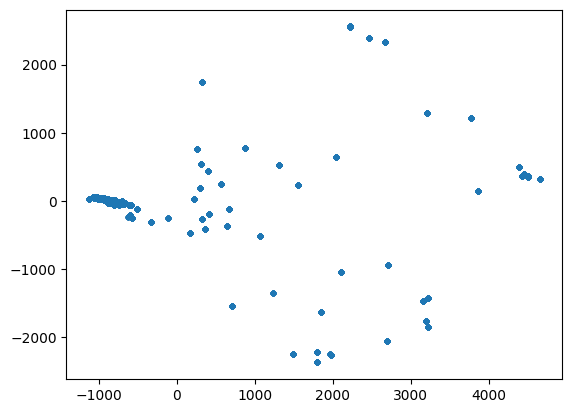

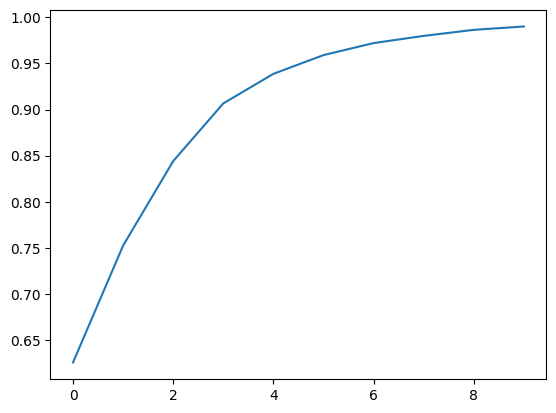

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pcs = pca.fit_transform(df)
plt.plot(pcs[:,0],pcs[:,1],'.')
#print(pca.explained_variance_ratio_)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(sum(pca.explained_variance_ratio_))

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNetCV
from sklearn.model_selection import cross_val_score,KFold
cv = KFold(n_splits=5,shuffle=True)
model = ElasticNetCV(max_iter=5000,cv=cv)
model.fit(df,y)
scores = cross_val_score(model,pcs,y,cv=cv)
print(np.mean(scores))

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV,KFold

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LarsCV,LassoLarsCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from itertools import product

cv = KFold(n_splits=5,shuffle=True)
estimators = [10,75,100]
learning_rates = np.arange(0.5,2,0.5)
param_grid = {'n_estimators': estimators, 'learning_rate': learning_rates}
model = AdaBoostRegressor()
gs = GridSearchCV(model,param_grid,scoring='r2')
gs.fit(pcs,y)

In [ ]:
gs.score(pcs,y)

In [ ]:
gs.cv_results_

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5,shuffle=True)
rfr = RandomForestRegressor()
print(np.mean(cross_val_score(rfr,pcs,y,cv=cv,scoring='neg_root_mean_squared_error')))

-2.4992770962935342


In [49]:
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
import keras

input = Input(shape=(df.shape[1],))
dropout = Dropout(rate=0.75)(input)
layer1 = Dense(100,activation='ReLU')(dropout)
layer2 = Dense(10,activation='sigmoid',activity_regularizer='L2')(layer1)
output = Dense(1,activation='linear')(layer2)

predictor = keras.Model(input,output)
predictor.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
predictor.fit(df,y,epochs=1000,batch_size=256,shuffle=True,validation_split=0.2,callbacks=[es])


Epoch 1/1000
30/30 [==============================] - 0s 5ms/step - loss: 79.1130 - accuracy: 0.0000e+00 - val_loss: 83.6510 - val_accuracy: 0.0000e+00
Epoch 2/1000
30/30 [==============================] - 0s 2ms/step - loss: 72.4498 - accuracy: 0.0000e+00 - val_loss: 81.1632 - val_accuracy: 0.0000e+00
Epoch 3/1000
30/30 [==============================] - 0s 2ms/step - loss: 69.9266 - accuracy: 0.0000e+00 - val_loss: 78.7614 - val_accuracy: 0.0000e+00
Epoch 4/1000
30/30 [==============================] - 0s 2ms/step - loss: 67.6603 - accuracy: 0.0000e+00 - val_loss: 76.4250 - val_accuracy: 0.0000e+00
Epoch 5/1000
30/30 [==============================] - 0s 2ms/step - loss: 65.4670 - accuracy: 0.0000e+00 - val_loss: 74.1603 - val_accuracy: 0.0000e+00
Epoch 6/1000
30/30 [==============================] - 0s 2ms/step - loss: 63.3433 - accuracy: 0.0000e+00 - val_loss: 71.9552 - val_accuracy: 0.0000e+00
Epoch 7/1000
30/30 [==============================] - 0s 2ms/step - loss: 61.2824 - accu